In [2]:
import urllib
import cv2
import os
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

### 사진 가져오기
셀카 이외의 이미지는 **unsplash**에서 royalty-free이미지를 가져왔습니다

(960, 720, 3)


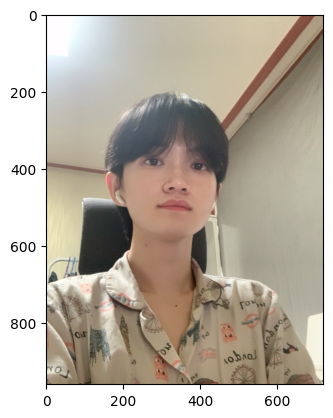

In [3]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = "../face detect/image/me.jpg"
img_orig = cv2.imread(img_path)

print(img_orig.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 세그멘테이션

In [4]:
# 저장할 파일 이름을 결정합니다
# os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# model_dir = os.getenv("HOME") + "/aiffel/human_segmentation/models"
model_dir = "model/"
# # os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
model_file = os.path.join(model_dir, "deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")

# # PixelLib가 제공하는 모델의 url입니다
# model_url = "https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5"

# # 다운로드를 시작합니다
# urllib.request.urlretrieve(
#     model_url, model_file
# )  # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('model/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x21e1f6ff048>)

In [5]:
# semantic segmentation을 수행하는 클래스 인스턴스
model = semantic_segmentation()
# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file)

In [6]:
# 분할 출력의 배열을 가져옴, 분할은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(img_path)  

In [8]:
# pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    "background",
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tv",
]
len(LABEL_NAMES)

21

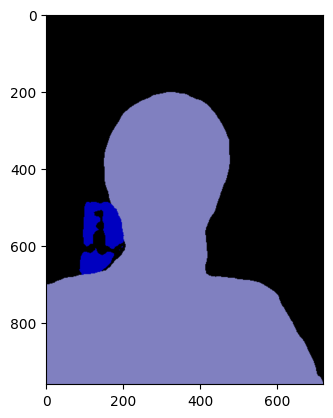

In [8]:
# 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [9]:
#  입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
segvalues  

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [15, 15, 15, ..., 15, 15,  0],
       [15, 15, 15, ..., 15, 15,  0],
       [15, 15, 15, ..., 15, 15,  0]], dtype=int64)

In [10]:
np.unique(segvalues) 


array([ 0,  9, 15], dtype=int64)

In [11]:
# segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in np.unique(segvalues) :
    print(LABEL_NAMES[class_id])

background
chair
person


In [12]:
# output에 어떤 색상으로 나타나 있는지 (이해할 필요는 없음)

# 컬러맵 만들기
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]  # 생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
bgr_color = colormap[15]  # 컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)
bgr_color

array([192, 128, 128])

In [14]:
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
seg_color = (bgr_color[2], bgr_color[1], bgr_color[0])  
seg_color

(128, 128, 192)

(960, 720)


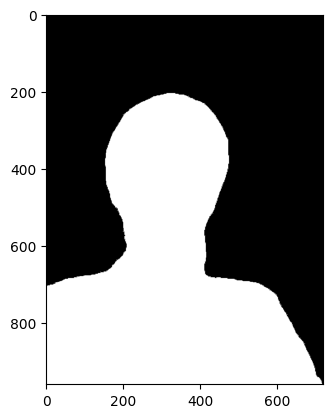

In [15]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

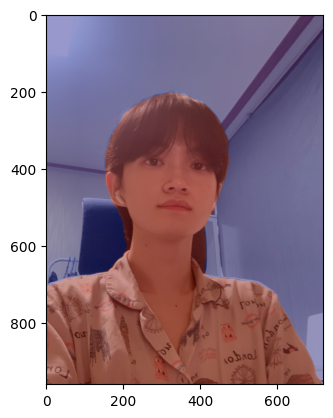

In [16]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 
#color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

plt.show()

### 배경 블러

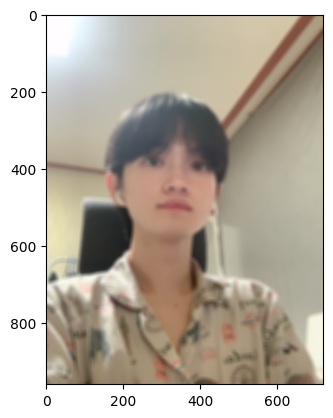

In [17]:
# (13,13)은 blurring kernel size를 뜻합니다
img_orig_transform = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_transform, cv2.COLOR_BGR2RGB))
plt.show()

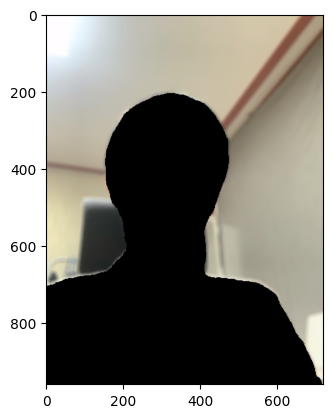

In [18]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
# plt.imshow(cv2.cvtColor(img_mask_color, cv2.COLOR_BGR2RGB))

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# # cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# # 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# # 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_transform = cv2.bitwise_and(img_orig_transform, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_transform, cv2.COLOR_BGR2RGB))
plt.show()

### 합성

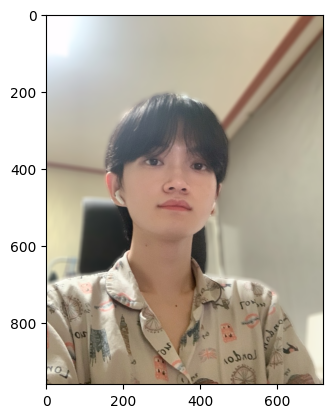

In [19]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_transform)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

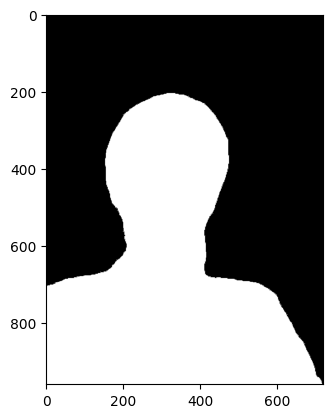

In [20]:
plt.imshow(img_mask_color)

사람을 블러로, 배경을 일반으로

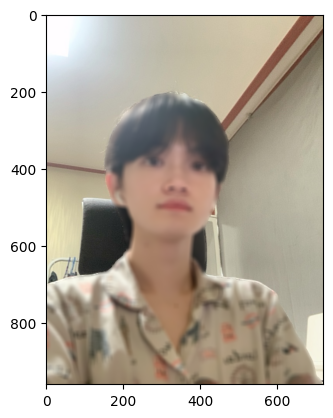

In [21]:
img_concat_blur_person = np.where(img_mask_color==255, img_orig_transform, img_orig )
plt.imshow(cv2.cvtColor(img_concat_blur_person, cv2.COLOR_BGR2RGB))
plt.show()

### 고양이 사진으로 해보기
매개변수로 블러를 안할 개체를 입력하면 나머지는 블러로 만드는 함수 작성

In [6]:
def blur_background(image_path, label_names, obj='person',chroma=False ):
    #모델에서 찾을 세그멘테이션할 수 있는 객체인지 판단 
    if obj not in label_names:
        print('해당 객체는 찾을 수 없습니다')
        return
    
    img_orig = cv2.imread(image_path)
    
    #모델 가져오기
    model = semantic_segmentation()
    model.load_pascalvoc_model('model/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
    #세그멘테이션
    segvalues, output = model.segmentAsPascalvoc(image_path)  
    
    # 컬러맵 만들기
    colormap = np.zeros((256, 3), dtype=int)
    ind = np.arange(256, dtype=int)
    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3
    
    #찾는 객체의 idx 찾기a
    obj_idx = label_names.index(obj)
    bgr_color = colormap[obj_idx]
    seg_color = (bgr_color[2], bgr_color[1], bgr_color[0])  
    
    #세그멘테이션 마스크 만들기 
    seg_map = np.all(output==seg_color, axis=-1) 
    img_mask = seg_map.astype(np.uint8) * 255

    
    #블러 작업
    img_orig_transform = cv2.blur(img_orig, (13,13))    
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)  #배경을 255로  
    img_bg_transform = cv2.bitwise_and(img_orig_transform, img_bg_mask) # 블러이미지에서 객체 지우기 
    #블러인지 크로마인지 확인
    if chroma == False:
        img_concat = np.where(img_mask_color==255, img_orig, img_bg_transform) #원본객체를 가져옴 
    else:
        # 녹색 배경으로 변경
        green_background = np.zeros_like(img_orig)
        green_background[:, :] = [0, 255, 0]  # RGB로 녹색
        img_concat = np.where(img_mask_color == 255, img_orig, green_background)

    #출력
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()

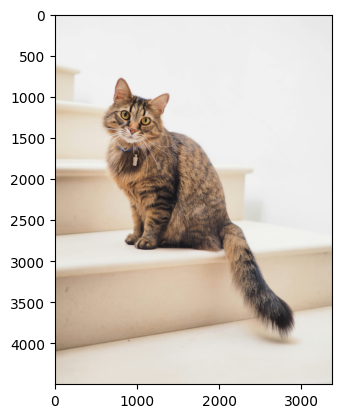

In [67]:
blur_background('image/cat.jpg',LABEL_NAMES,'cat')

크로마키로 해보기

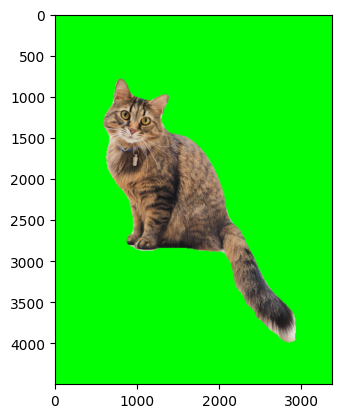

In [68]:
blur_background('image/cat.jpg',LABEL_NAMES,'cat',chroma=True)

### 다양한 사진을 적용하면서 문제점 찾기
블러로하면 구분이 잘 안되니 크로마키로 실험

#### 얼굴탐지 실패 사진
얼굴탐지에서 얼굴을 못 찾았던 다양한 각도의 근접 셀카는 잘 탐지

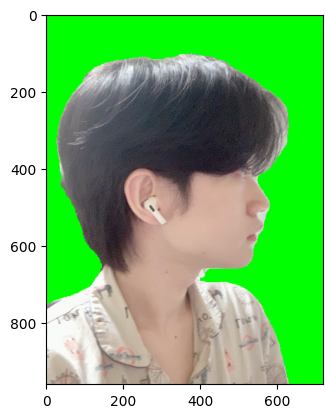

In [64]:
blur_background("../face detect/image/me_side_full.jpg",LABEL_NAMES,chroma=True)

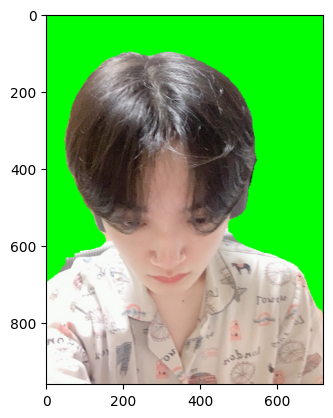

In [65]:
blur_background("../face detect/image/me_high.jpg",LABEL_NAMES,chroma=True)

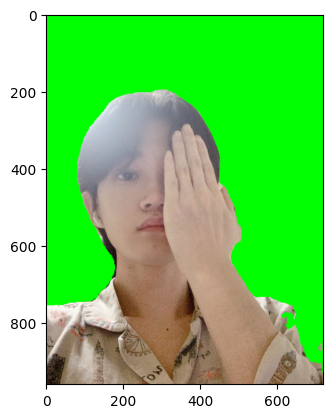

In [75]:
blur_background("../face detect/image/me_hided.jpg",LABEL_NAMES,chroma=True)

#### 역광사진
역광의 사진의 경우 어느정도 잘 분리하지만, 발 부분이 잘리는 경우가 있음



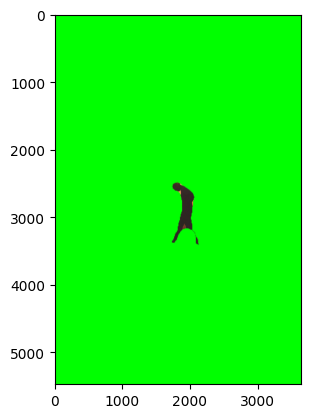

In [83]:
blur_background("image/person1.jpg",LABEL_NAMES,chroma=True)

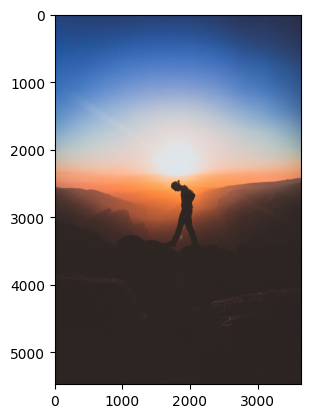

In [85]:
plt.imshow(cv2.cvtColor(cv2.imread("image/person1.jpg"), cv2.COLOR_BGR2RGB))
plt.show()

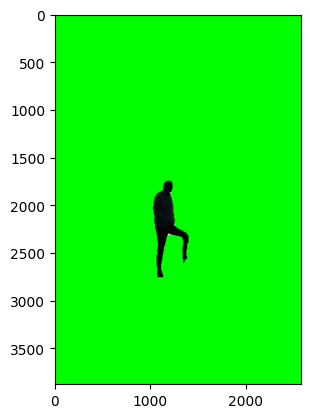

In [84]:
blur_background("image/person2.jpg",LABEL_NAMES,chroma=True)

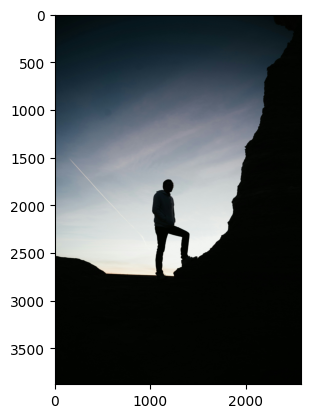

In [86]:
plt.imshow(cv2.cvtColor(cv2.imread("image/person2.jpg"), cv2.COLOR_BGR2RGB))
plt.show()

#### 군중
상당히 많은 문제가 있음

1. 중앙 인물이 매고있는 가방을 전부 없애거나 말거나 해야함
2. 중앙 인물의 팔 사이의 공간이 주황색이라서 사람으로 같이 인식
3. x 1500 즈음에 오토바이 탄 사람을 오토바이만 사람으로 인식
4. x 5000 즈음에 그냥 차량을 사람으로 인식
5. 맨 오른쪽 사람의 얼굴을 인식 못 함 

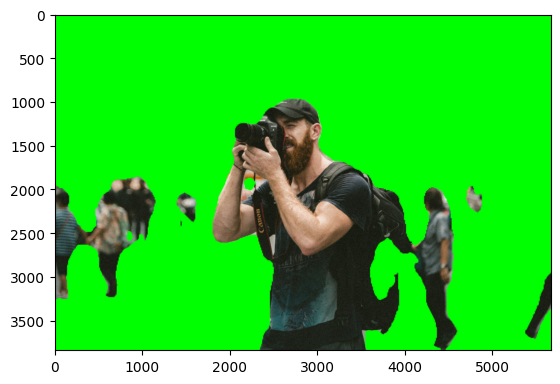

In [88]:
blur_background("image/person3.jpg",LABEL_NAMES,chroma=True)

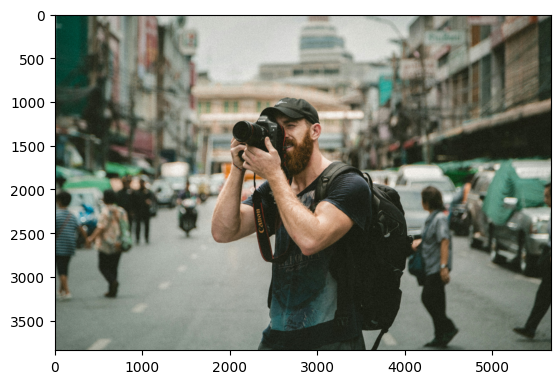

In [89]:
plt.imshow(cv2.cvtColor(cv2.imread("image/person3.jpg"), cv2.COLOR_BGR2RGB))
plt.show()

#### 숨어있는 고양이

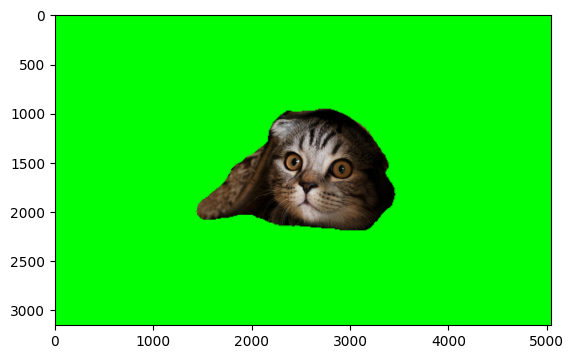

In [90]:
blur_background("image/cat1.jpg",LABEL_NAMES,'cat',chroma=True)

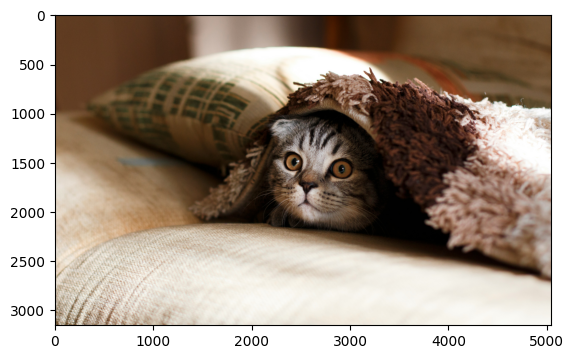

In [91]:
plt.imshow(cv2.cvtColor(cv2.imread("image/cat1.jpg"), cv2.COLOR_BGR2RGB))
plt.show()

### 해결방안 모색
**문제점** : 경계가 모호한 부분에 대하여 인식에 어려움이 있음.  

#### 해결방안 1  
사람이 손으로 객체의 가장자리에 **경계를 차이가 뚜렷한 색으로 선을 그어주면** 좋을 지 테스트

**결론**

부자연스러운 선이 들어가서인지 오히려 성능이 더 안좋아짐

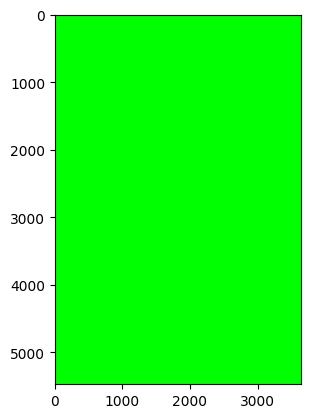

In [92]:
blur_background("image/person1_edited.jpg",LABEL_NAMES,chroma=True)

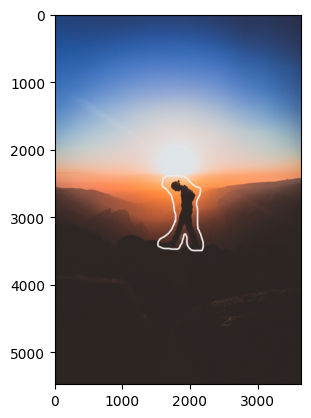

In [93]:
plt.imshow(cv2.cvtColor(cv2.imread("image/person1_edited.jpg"), cv2.COLOR_BGR2RGB))
plt.show()

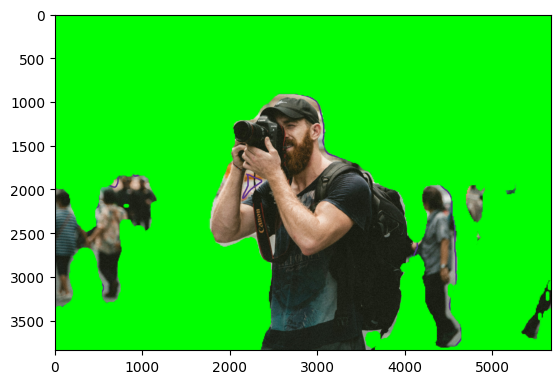

In [94]:
blur_background("image/person3_edited.jpg",LABEL_NAMES,chroma=True)

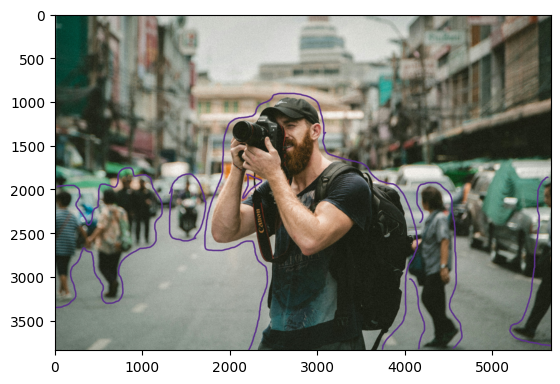

In [95]:
plt.imshow(cv2.cvtColor(cv2.imread("image/person3_edited.jpg"), cv2.COLOR_BGR2RGB))
plt.show()

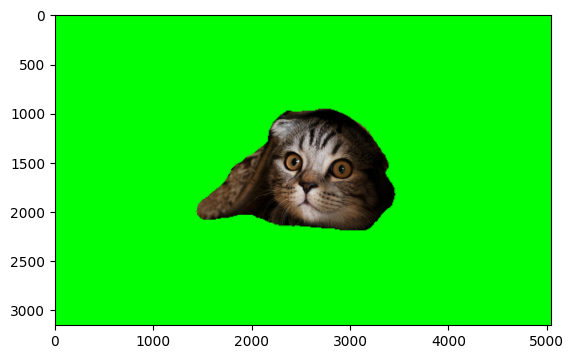

In [96]:
blur_background("image/cat1.jpg",LABEL_NAMES,'cat',chroma=True)

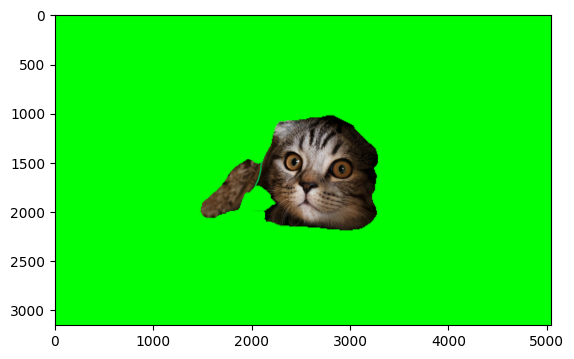

In [99]:
blur_background("image/cat1_edited.jpg",LABEL_NAMES,'cat',chroma=True)

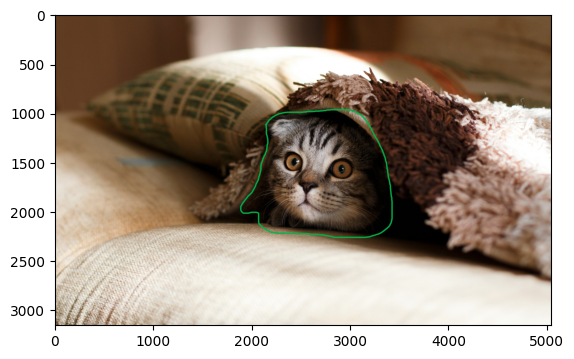

In [100]:
plt.imshow(cv2.cvtColor(cv2.imread("image/cat1_edited.jpg"), cv2.COLOR_BGR2RGB))
plt.show()

#### 해결방안 2
경계가 모호한 부분을 인위적이지 않고 보다 자연적이지만 **채도를 높여** 색상 차이를 돋보이게 함  
chatgpt에게 물어보니 CLAHE라는 방법을 사용하면 된다고 함

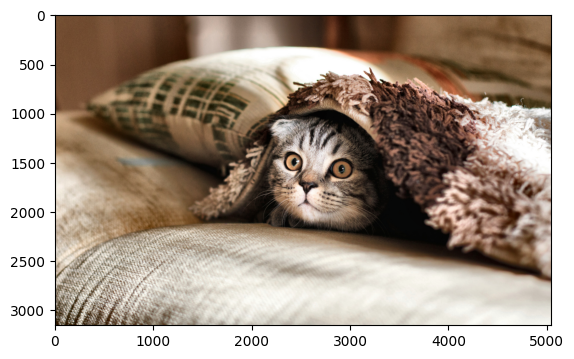

In [12]:
cat = cv2.imread('image/cat1.jpg')

# CLAHE 객체 생성
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# 이미지의 각 채널에 CLAHE 적용
lab = cv2.cvtColor(cat, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
l = clahe.apply(l)
lab = cv2.merge((l, a, b))
enhanced_image = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

# 결과 보여주기
plt.imshow(enhanced_image)
plt.show()

채도를 높이기 전 원본 사진

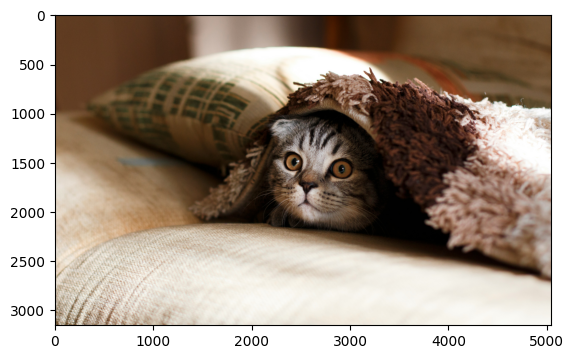

In [15]:
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
plt.show()

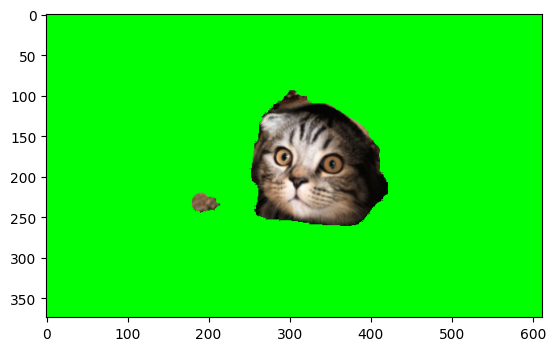

In [10]:
blur_background("image/cat1_clahe.png",LABEL_NAMES,'cat',chroma=True)

### 결론 및 회고

이미지에다가 사람이 인위적으로 경계선을 그어주는건 역효과가 있었고,   
**색상 경계가 모호해서 나타난 문제는 이미지의 색상대비를 높이면 조금 성능이 좋아지는 경우**도 있었다.  
많은 사람이 있고 심지어 블러가 된 상태에서의 문제점은 어떻게 해결하면 좋을 지 감이 안잡혔다.  

당장 해볼 수 있는 것들이 입력 이미지를 바꾸는 것이라고 생각했는데, 다른 방향성으로 탐구해볼 만 한 것이 있을지 더 고민해봐야 한다.  
해결방안을 모색한다는 것이 매우 막막하지만, 그래도 채도를 높임으로서 조금 더 세그멘테이션을 잘 해 기분이 좋았다.  
다만 이게 이 사진이 특별했는지, 다른 사진에서도 좋은 효과가 있을 지는 더 실험이 필요해 보인다.  

또한 채도를 높이기 위하여 chatgpt에 물어봐 그냥 나오는 `CLAHE`라는 방법을 아무것도 모른 채 썼는데 이게 정확히 무었인지도 알아봐야 한다.